# Introdução:

Este exercício visa delimitar e quantificar os domínios hidrogeológicos dentro da sub bacia do Rio Preto, utilizando análise espacial em Python. O recorte dos domínios foi realizado com base na sobreposição de planos de informações obtidas na Plataforma IDE Sisema, permitindo a extração de informações detalhadas sobre a área de estudo.

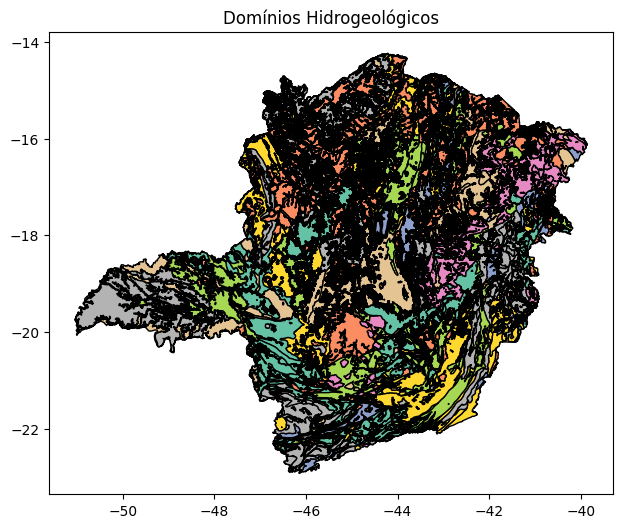

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carrega o arquivo GeoPackage
gdf = gpd.read_file('dominios_hidrogeologicos.gpkg')

# Define uma coluna para categorização (substitua 'dominio' pelo nome correto da coluna)
coluna_categorica = 'nome_unida'

# Plota o GeoDataFrame com colormap categórico
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(column=coluna_categorica, cmap='Set2', legend=False, edgecolor='black', ax=ax)

# Configurações do gráfico
ax.set_title('Domínios Hidrogeológicos')
plt.show()

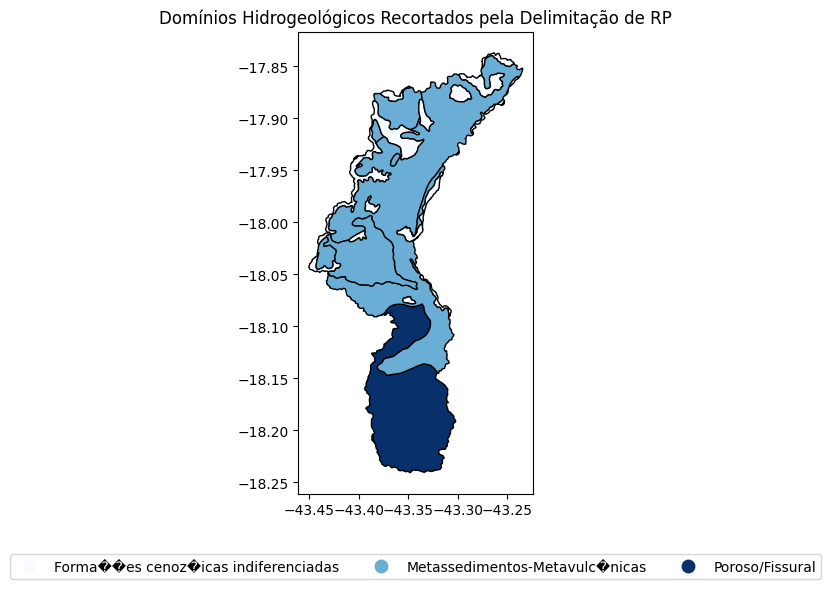

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cmocean

# Carrega os arquivos GeoPackage
delimitacao_rp = gpd.read_file('delimitacao_RP.gpkg')
dominios_hidrogeologicos = gpd.read_file('dominios_hidrogeologicos.gpkg')

# Realiza o recorte espacial
dominios_recortados = gpd.overlay(dominios_hidrogeologicos, delimitacao_rp, how='intersection')

# Salva o arquivo no formato GeoPackage
dominios_recortados.to_file('dominios_recortados.gpkg', driver="GPKG")

# Define a coluna para categorização (substitua 'subdom' pelo nome correto da coluna)
coluna_categorica = 'subdom'

# Plota o GeoDataFrame resultante
fig, ax = plt.subplots(figsize=(10, 6))
dominios_recortados.plot(
    column=coluna_categorica,
    cmap='Blues',
    legend=True,
    edgecolor='black',
    ax=ax,
    legend_kwds={'loc': 'lower center', 'bbox_to_anchor': (0.5, -0.2), 'ncol': 3}
)

# Configurações do gráfico
ax.set_title('Domínios Hidrogeológicos Recortados pela Delimitação de RP')

# Ajustando layout para melhor visualização
plt.tight_layout()

# Exibe o gráfico
plt.show()


Área de cada classe (hectares):
subdom
Forma��es cenoz�icas indiferenciadas    4.064390e-07
Metassedimentos-Metavulc�nicas          2.059834e-06
Poroso/Fissural                         8.854526e-07
Name: area_ha, dtype: float64

Percentual de cada classe:
subdom
Forma��es cenoz�icas indiferenciadas    12.126263
Metassedimentos-Metavulc�nicas          61.455924
Poroso/Fissural                         26.417813
Name: area_ha, dtype: float64


<ipython-input-31-3558c80bacfc>:11: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dominios_recortados['area_ha'] = dominios_recortados.area / 10000


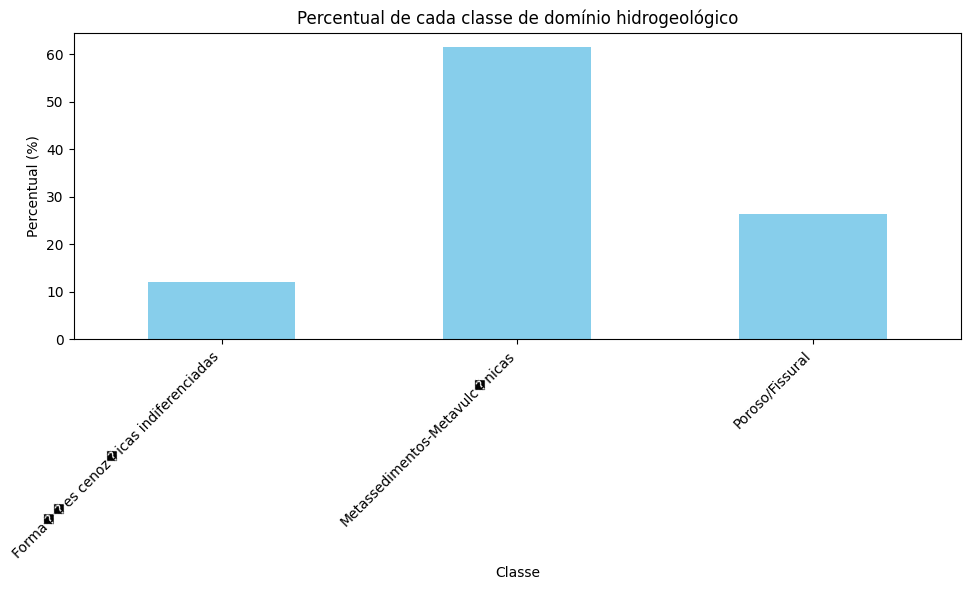

In [31]:

import geopandas as gpd
import matplotlib.pyplot as plt
import cmocean

# Carrega o arquivo GeoPackage com os domínios recortados
dominios_recortados = gpd.read_file('dominios_recortados.gpkg') # Assumindo que o arquivo gerado foi salvo como 'dominios_recortados.gpkg'

# Calcula a área de cada polígono em hectares
dominios_recortados['area_ha'] = dominios_recortados.area / 10000

# Agrupa por classe (coluna categórica) e soma as áreas
area_por_classe = dominios_recortados.groupby('subdom')['area_ha'].sum() # Substitua 'subdom' pelo nome correto da coluna

# Calcula a área total
area_total = area_por_classe.sum()

# Calcula a porcentagem de cada classe
percentual_por_classe = (area_por_classe / area_total) * 100


# Imprime os resultados
print("Área de cada classe (hectares):")
print(area_por_classe)
print("\nPercentual de cada classe:")
print(percentual_por_classe)


# Plota um gráfico de barras para melhor visualização
plt.figure(figsize=(10, 6))
percentual_por_classe.plot(kind='bar', color='skyblue')
plt.title('Percentual de cada classe de domínio hidrogeológico')
plt.xlabel('Classe')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#Discussão:

Os resultados indicam que a maior parte da área recortada pertence à classe "Metassedimentos-Metavulcânicas" (61,46%), seguida por "Poroso/Fissural" (26,42%) e "Formações Cenozóicas Indiferenciadas" (12,13%).

Os "Metassedimentos-Metavulcânicas" estão geralmente associadas a aquíferos fraturados, onde a disponibilidade de água depende da presença de falhas e fraturas. O domínio "Poroso/Fissural" combina características de aquíferos porosos, que armazenam e transmitem água em seus poros, e fissurais, onde a circulação ocorre por fraturas. Já as "Formações Cenozóicas Indiferenciadas" são geralmente depósitos mais recentes, com maior variabilidade na capacidade de armazenamento e recarga, podendo ter importância estratégica para o suprimento hídrico superficial e subterrâneo.